<a href="https://colab.research.google.com/github/PKGISREAL/Big_data/blob/main/Homework_pandas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)" data-toc-modified-id="-Homework-2-(Topics-5-7:-Groupby,-Merge,-Visualization)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)</center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Task-0." data-toc-modified-id="Task-0.-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>Task 0.</a></span></li><li><span><a href="#Task-1." data-toc-modified-id="Task-1.-1.0.0.2"><span class="toc-item-num">1.0.0.2&nbsp;&nbsp;</span>Task 1.</a></span></li><li><span><a href="#Task-2:" data-toc-modified-id="Task-2:-1.0.0.3"><span class="toc-item-num">1.0.0.3&nbsp;&nbsp;</span>Task 2:</a></span></li><li><span><a href="#Task-3:" data-toc-modified-id="Task-3:-1.0.0.4"><span class="toc-item-num">1.0.0.4&nbsp;&nbsp;</span>Task 3:</a></span></li><li><span><a href="#Task-4:" data-toc-modified-id="Task-4:-1.0.0.5"><span class="toc-item-num">1.0.0.5&nbsp;&nbsp;</span>Task 4:</a></span></li><li><span><a href="#Task-5:" data-toc-modified-id="Task-5:-1.0.0.6"><span class="toc-item-num">1.0.0.6&nbsp;&nbsp;</span>Task 5:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.7"><span class="toc-item-num">1.0.0.7&nbsp;&nbsp;</span>Вопросы:</a></span></li><li><span><a href="#Task-6:" data-toc-modified-id="Task-6:-1.0.0.8"><span class="toc-item-num">1.0.0.8&nbsp;&nbsp;</span>Task 6:</a></span></li><li><span><a href="#Вопросы:" data-toc-modified-id="Вопросы:-1.0.0.9"><span class="toc-item-num">1.0.0.9&nbsp;&nbsp;</span>Вопросы:</a></span></li></ul></li></ul></li></ul></li></ul></div>

# <center> Homework 2 (Topics 5-7: Groupby, Merge, Visualization)

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Ещё раз (как и в задании 1) считайте в переменные tr_mcc_codes, tr_types, transactions и customers_gender_train. В transactions опять считайте только первые 1000000 строк.

In [27]:
tr_mcc_codes = pd.read_table('tr_mcc_codes.csv', sep = ';')
tr_types = pd.read_table('tr_types.csv', sep = ';')
transactions = pd.read_table('transactions.csv', nrows = 1000000, sep = ',')
gender_train = pd.read_table('gender_train.csv', sep = ',')


#### Task 0.
Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с customers_gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [28]:
merged_df = pd.merge(transactions, gender_train, on='customer_id', how='left')
merged_df = pd.merge(merged_df, tr_types, on='tr_type', how='inner')
merged_df = pd.merge(merged_df, tr_mcc_codes, on='mcc_code', how='inner')
print(len(merged_df))

999584


#### Task 1.
1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount). (*)

Выведите ответ в виде вещественного числа, округлённого до двух знаков после запятой, отделив дробную часть точкой в формате "123.45"

##### Пояснения:
(\*) Если в результате для мужчин получились значения [-1,-3,-5], а для женщин [-1,-2,-3],  
то модуль разницы между средними арифметическими -3 и -2 будет равен 1.

(\**) Обратите внимание, что для вычисления модуля разности точных знаний о том,  
какой класc относится к мужчинам, а какой - к женщинам, пока не требуется.

(\***) Округление не нужно производить отдельно по средним тратам женщин и мужчин, а только в самом конце, когда получите значение модуля разницы трат.

In [10]:
negative_transactions = merged_df[merged_df['amount'] < 0]
gender_avg_spending = negative_transactions.groupby('gender')['amount'].mean()
difference = abs(gender_avg_spending[1] - gender_avg_spending[0])
print(f"{difference:.2f}")

32718.05


#### Task 2:
1. Создайте новый столбец - mcc_code+tr_type, сконкатенировав значения из соответствующих столбцов. (\*)
2. Оставьте только наблюдения с отрицательным значением amount. Посчитайте дисперсию по категориям получившегося столбца mcc_code+tr_type, в которых количество наблюдений >= 10.
3. Определите отношение максимальной дисперсии к минимальной.

Выведите ответ в виде вещественного числа, округлённого до ближайшего целого в формате "123456" без дробной части.

##### Пояснения:
(\*) Для конкатенации значений в столбцах можно использовать метод .astype(str) для серии и складывать соответствующие серии. Либо же применять apply к строкам датафрейма, прописывая логику преобразования и конкатенации значений внутри.

(\**) Для одновременного подсчета количества наблюдений и дисперсии по категориям можно воспользоваться функцией .agg()

In [29]:
merged_df['mcc_code+tr_type'] = transactions['mcc_code'].astype(str) + transactions['tr_type'].astype(str)

negative_amount_df = merged_df[merged_df['amount'] < 0]

df_grouped = negative_amount_df.groupby('mcc_code+tr_type')['amount'].agg(['count', 'var'])
df_disp = df_grouped[df_grouped['count'] >= 10]

max_disp = df_disp['var'].max()
min_disp = df_disp['var'].min()
ratio = max_disp / min_disp

print(round(ratio))

43189847


#### Task 3:
1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 5 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". (\*)
2. Выделите среди них те, которые встречаются одновременно и у мужчин, и у женщин:
    - 1) Покупка. POS ТУ СБ РФ
    - 2) Списание после проведения претензионной работы
    - 3) Плата за получение наличных. Россия
    - 4) Перевод на карту/ с карты через АТМ (со взиманием комиссии с отправителя) по счету в овердрафте
    - 5) Плата за получение наличных в АТМ. Россия
    - 6) Наличные. Зарубеж. банк
    - 7) Возврат покупки. POS ТУ Россия

##### Пояснения:
(\*) Если максимальные суммы приходов по каким-то типам были равны [1,2,3,4,5,6,7,8], то 5 минимальных из них: [1,2,3,4,5]

In [30]:
income = merged_df[merged_df['amount'] > 0]

max_income = income.groupby(['tr_type', 'tr_description', 'gender'])['amount'].max().reset_index()

top_5_min = max_income.groupby('gender').apply(lambda x: x.nsmallest(5, 'amount'))

merged_top_5_min = top_5_min.merge(top_5_min, on='tr_description')

diff_genders_with_same_discriptions = merged_top_5_min[(merged_top_5_min['gender_x'] == 0) & (merged_top_5_min['gender_y'] == 1)]

print(diff_genders_with_same_discriptions['tr_description'])

2    Плата за получение наличных в АТМ. Россия
Name: tr_description, dtype: object


Ответ : **2**

#### Task 4:
1. Выделите из поля tr_datetime относительный день tr_day (первое число до точного времени). (\*)
2. Отфильтруйте строки таким образом, чтобы оставить только те транзакции, у которых в соответствующий относительный день tr_day количество уникальных MCC кодов при транзакциях было больше 75 (можно воспользоваться функцией nunique())
3. Сгруппируйте полученный отфильтрованный датафрейм по MCC коду и полу, после чего, пронализировав результат, выберите верные варианты ответов ниже (\**):
    - 1) gender == 0 - женщины, gender == 1 - мужчины
    - 2) gender == 1 - женщины, gender == 0 - мужчины
    - 3) Абсолютное значение медианы с типом "Флористика" (расходов/приходов) у мужчин выше той же медианы у женщин
    - 4) Абсолютное значение медианы женских трат (расходов/приходов) на ценные бумаги выше мужских
    - 5) Абсолютное значение медианы женских трат (расходов/приходов) в категории "Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков" ниже мужских
    
##### Пояснения:
(\*) Для того, чтобы выделить всё, что стоит до первого пробела, можо использовать строковые методы для датафрейма - .str.split(), например. Либо же реализовывать логику выделения подстроки с помощью метода apply. <br>
(\**) Понять, какой класс к какому типу транзакций (мужские/женские) относится можно, если поизучать типичные для мужчин/женщин категории и сравнить средние/медианы расходов и/или приходов в них.

In [31]:
### Type your code here
merged_df['tr_day'] = merged_df['tr_datetime'].str.split(' ').str[0]

filtered_df = merged_df.groupby('tr_day').filter(lambda x: x['mcc_code'].nunique() > 75)

grouped_df = filtered_df.groupby(['mcc_code','gender', 'mcc_description'])['amount'].median().reset_index()

grouped_df.head(10)

,mcc_code,gender,mcc_description,amount
0,742,0.0,Ветеринарные услуги,-19651.76
1,742,1.0,Ветеринарные услуги,-47770.63
2,1711,0.0,"Генеральные подрядчики по вентиляции, теплосна...",-674897.69
3,1711,1.0,"Генеральные подрядчики по вентиляции, теплосна...",-14912.88
4,1731,1.0,Подрядчики по электричеству,-55923.30
5,1799,0.0,"Подрядчики, специализированная торговля — нигд...",-45704.39
6,1799,1.0,"Подрядчики, специализированная торговля — нигд...",-11274.50
7,2741,0.0,Разнообразные издательства/печатное дело,-20746.42
8,2741,1.0,Разнообразные издательства/печатное дело,-17338.47
9,3000,0.0,"Авиалинии, авиакомпании",-269822.97


In [33]:
print(grouped_df.loc[grouped_df['mcc_description'] == 'Флористика'])
print(grouped_df.loc[grouped_df['mcc_description'].str.lower().str.contains('ценные бумаги')])
print(grouped_df.loc[grouped_df['mcc_description'] == 'Бары, коктейль-бары, дискотеки, ночные клубы и таверны — места продажи алкогольных напитков'])

     mcc_code  gender mcc_description    amount
224      5992     0.0      Флористика -13890.99
225      5992     1.0      Флористика -18865.69
     mcc_code  gender                mcc_description    amount
242      6211     0.0  Ценные бумаги: брокеры/дилеры  -6737.75
243      6211     1.0  Ценные бумаги: брокеры/дилеры -11229.58
     mcc_code  gender                                    mcc_description  \
175      5813     0.0  Бары, коктейль-бары, дискотеки, ночные клубы и...   
176      5813     1.0  Бары, коктейль-бары, дискотеки, ночные клубы и...   

       amount  
175  -9387.93  
176 -13475.49  


#### Task 5:
1. Разбейте расходы (отрицательные значения сумм) на 5 бакетов amount_bucket равного объёма (с помощью pd.qcut), разбив все траты на категории 'Very High', 'High', 'Middle', 'Low', 'Very Low'. (\*)
2. Оставшиеся неотрицательные траты отнесите к категории 'Income'.
(воспользуйтесь функцией .cat.add_categories('Income') для того, чтобы добавить новую категорию 'Income' к категориям 'Very High', 'High', 'Middle', 'Low', 'Very Low', а затем заполните пустые значения новой категорией).
3. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
3. После этого постройте сводную таблицу, значениями в которой является пол gender, индексы - tr_hour, столбцы - amount_bucket.
4. Отрисуйте полученные результаты, передав их в функцию plot_pivot_table, расположенную ниже.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) Ночные поступления денег (01-05 часов) в более чем 85% случаев являются мужскими.
    - 2) Посмотрев на долю мужчин в поступлениях средств (Income), можно сделать вывод, что количество поступлений средств женщинам в целом больше, чем мужчинам.
    - 3) Самые низкие траты в 3 часа ночи осуществляются в более 70% случаев женщинами.
    - 4) Существуют особые часы в мелких тратах, когда женщины тратят намного больше мужчин (>80%)
    - 5) Посмотрев на долю мужчин в максимальных тратах средств (Very High), можно сделать вывод, что количество высоких трат в каждый возможный час мужчин больше, чем у женщин.

##### Пояснения:
(\*) Обратите внимание, что в категории Very High Должны оказаться максимальные по модулю отрицательные транзакции. <br>
(\**) Например, для строки "0 10:23:26" час будет равен 10, а для строки "6 07:08:31"- 07. Можно воспользоваться функциями str.split() или str.find() и
функцией .apply(lambda x: x[])

In [38]:
def plot_pivot_table(pivot_table):
    plt.figure(figsize=(9, 11))
    sns.heatmap(pivot_table, cmap="YlGnBu", annot=True,
                fmt='.3g', annot_kws={"size": 14})
    plt.xticks(fontsize=15)
    plt.yticks(rotation=0, fontsize=15)
    plt.xlabel('Bucket', size=18)
    plt.ylabel('Hour', fontsize=18)
    plt.title('Gender analysis per bucket and hour', fontsize=20)
    plt.show()

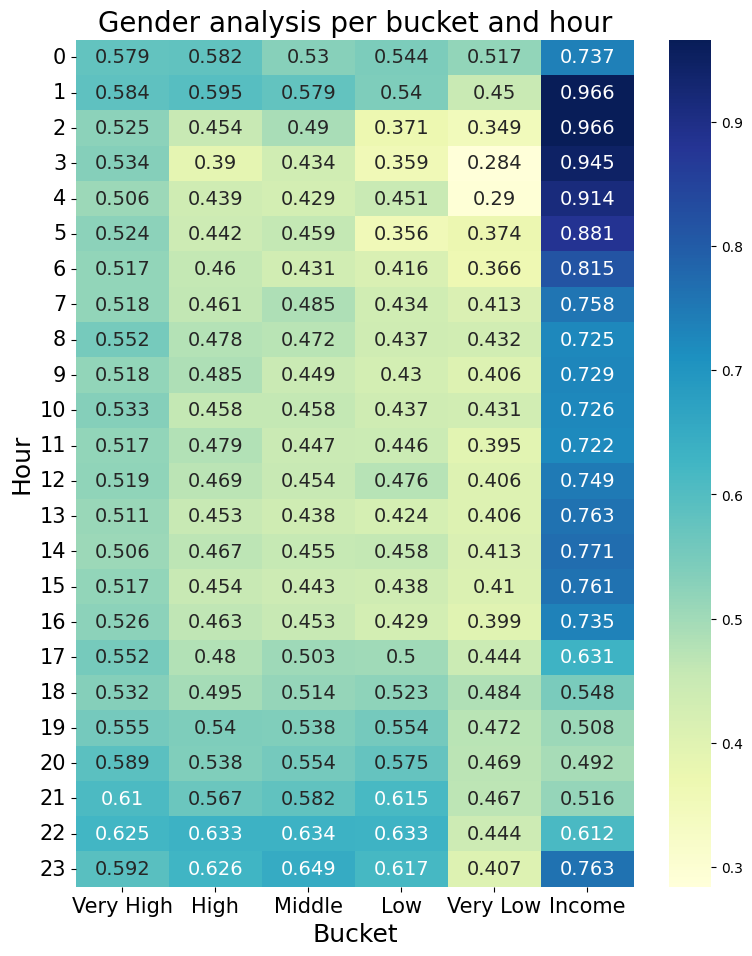

In [39]:
merged_df['amount_bucket'] = pd.qcut(merged_df.loc[merged_df['amount'] < 0, 'amount'] , q=5, labels=['Very High', 'High', 'Middle', 'Low', 'Very Low'])
merged_df['amount_bucket'] = merged_df['amount_bucket'].cat.add_categories('Income')
merged_df.loc[merged_df['amount'] >= 0, 'amount_bucket'] = 'Income'

merged_df['tr_hour'] = merged_df['tr_datetime'].apply(lambda x: int(x.split(':')[0][-2:]))

pivot_table = pd.pivot_table(merged_df, values='gender', index='tr_hour', columns='amount_bucket')

plot_pivot_table(pivot_table)

Ответ: **1) 3) 5)**

#### Task 6:
1. Измените тип поля tr_day на int.
2. Выберите из transactions все MCC коды, которые встретились в выборке более чем 60000 раз.
3. Сгруппируйте отфильтрованный датафрейм по дню и MCC-коду, получая средние значения суммы amount.  
4. Далее отрисуйте зависимость средних сумм (может пригодится метод unstack()) по каждому из MCC-кодов по дням.
5. Выберите верные ответы на вопросы ниже.

#### Вопросы:
    - 1) 2 из полученных MCC-кодов связаны с финансовыми институтами
    - 2) 2 MCC кода, связанные со снятием наличности имеют в целом разные знаки (в одном случае почти везде - траты, в другом - пополнения)
    - 3) Бакалейные магазины обладают максимальными средними тратами среди выбранных MCC-кодов
    - 4) Денежные переводы имеют как минимум 3 явных минимума средних
    - 5) Категория "Звонки с использованием телефонов, считывающих магнитную ленту" имеет визуально очень большую дисперсию.

mcc_code         4814           4829          5411           6010  \
tr_day                                                              
0        -5631.316489 -214754.866266 -15462.567344   90390.672987   
1        -6375.587685 -158317.573750 -17770.243543   57658.709639   
2        -4280.502021 -311439.224857 -13197.019449   95514.734275   
3        -5683.344844 -267813.727273 -12584.078209  104576.823744   
4        -7071.730388 -351382.308480 -12376.649916  110324.802287   
...               ...            ...           ...            ...   
452      -5084.165513 -215973.976904 -11805.167583   97106.748032   
453      -5684.247016 -190370.376239 -11932.826972  116383.905616   
454      -4786.101095 -177081.530909 -13345.274312  105039.577393   
455      -5007.255934 -243267.887869 -12953.262927  100973.037396   
456      -5945.182500 -274049.766409 -15411.548528  109925.614017   

mcc_code          6011  
tr_day                  
0        -55388.115175  
1        -38938.920557  
2 

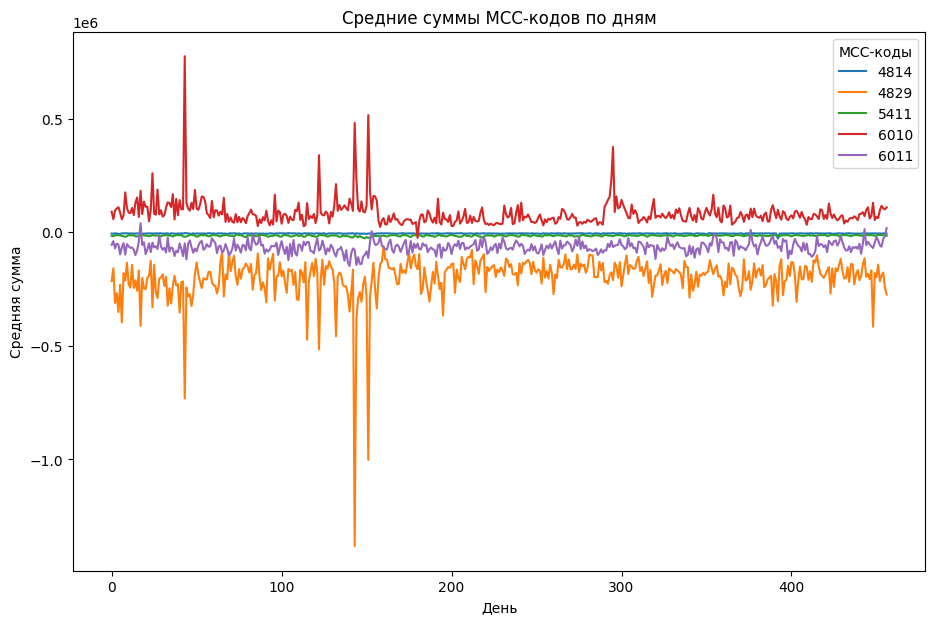

In [40]:
merged_df['tr_day'] = merged_df['tr_day'].astype(int)

mcc_60000 = transactions['mcc_code'].value_counts()[merged_df['mcc_code'].value_counts() > 60000]

merged_df_mcc60000 = merged_df[merged_df['mcc_code'].isin(mcc_60000.index)]

gr = merged_df_mcc60000.groupby(['tr_day', 'mcc_code'])['amount'].mean()

gr = gr.unstack()

print(gr)

#описание кодов
mcc_descriptions = tr_mcc_codes[tr_mcc_codes['mcc_code'].isin(gr.columns)]
print(mcc_descriptions[['mcc_code', 'mcc_description']])


gr.plot(figsize=(11, 7), title='Средние суммы MCC-кодов по дням')
plt.xlabel('День')
plt.ylabel('Средняя сумма')
plt.legend(title='MCC-коды')
plt.show()

Ответ: 1) 2) 4)